<a href="https://colab.research.google.com/github/Anurag-Mohan/Anurag-Mohan/blob/main/AmazonData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv("bestsellers with categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
print(df.info())
print(df.describe())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [5]:
print("Initial DataFrame Info:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None

Missing values per column:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [6]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [7]:
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Shape after dropping duplicates: (550, 7)


In [8]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
print("Updated column names:", df.columns.tolist())

Updated column names: ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [11]:
print(df.dtypes)

name            object
author          object
user_rating    float64
reviews          int64
price          float64
year             int64
genre           object
dtype: object


In [10]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
df.to_csv("cleaned_amazon_data.csv", index=False)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_csv("cleaned_amazon_data.csv")

<ipython-input-16-dcc453e8d3c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_books, x='reviews', y='name', palette='viridis')


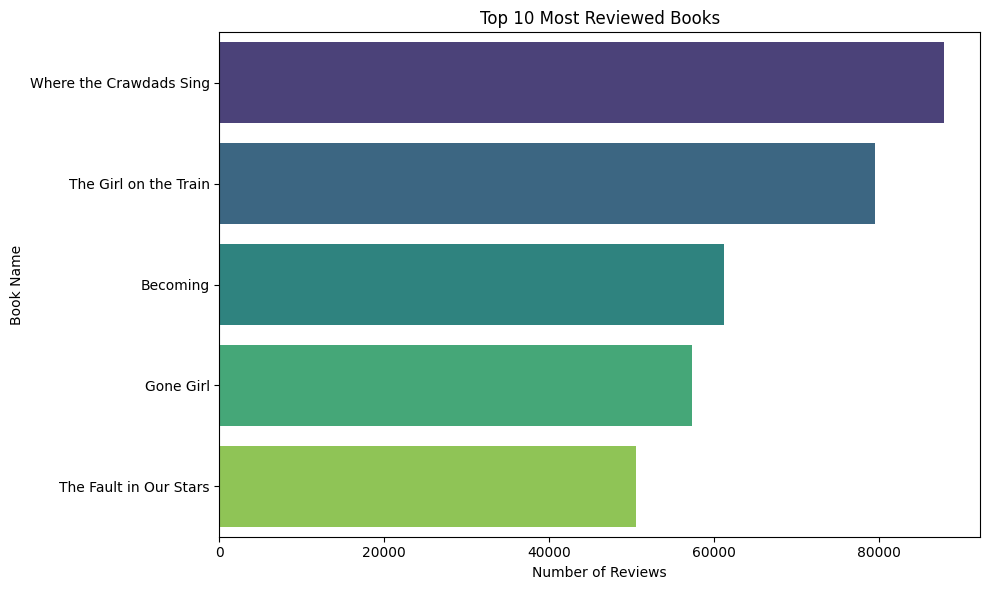

In [16]:
top_books = df.sort_values(by='reviews', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_books, x='reviews', y='name', palette='viridis')
plt.title("Top 10 Most Reviewed Books")
plt.xlabel("Number of Reviews")
plt.ylabel("Book Name")
plt.tight_layout()
plt.show()

In [17]:
top_rated = df[df['user_rating'] == df['user_rating'].max()]

print("Books with Highest User Rating:")
print(top_rated[['name', 'author', 'user_rating']])


Books with Highest User Rating:
                                                  name                 author  \
40            Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.   
41            Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.   
81   Dog Man and Cat Kid: From the Creator of Capta...             Dav Pilkey   
82   Dog Man: A Tale of Two Kitties: From the Creat...             Dav Pilkey   
83   Dog Man: Brawl of the Wild: From the Creator o...             Dav Pilkey   
84   Dog Man: Brawl of the Wild: From the Creator o...             Dav Pilkey   
85   Dog Man: Fetch-22: From the Creator of Captain...             Dav Pilkey   
86   Dog Man: For Whom the Ball Rolls: From the Cre...             Dav Pilkey   
87   Dog Man: Lord of the Fleas: From the Creator o...             Dav Pilkey   
146  Goodnight, Goodnight Construction Site (Hardco...   Sherri Duskey Rinker   
147  Goodnight, Goodnight Construction Site (Hardco...   Sherri Duskey Rinker

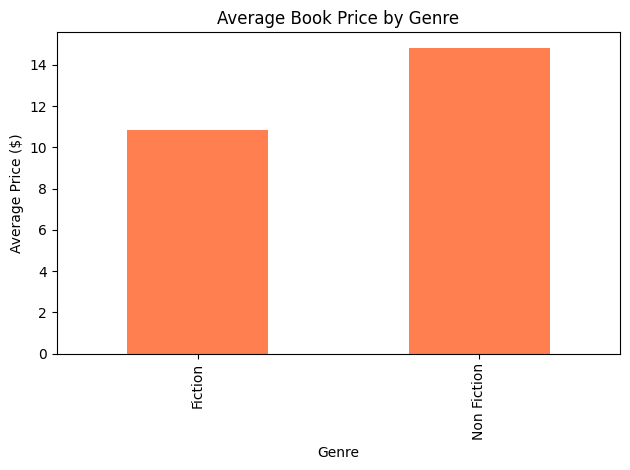

In [18]:
avg_price = df.groupby('genre')['price'].mean()

avg_price.plot(kind='bar', color='coral')
plt.title("Average Book Price by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()


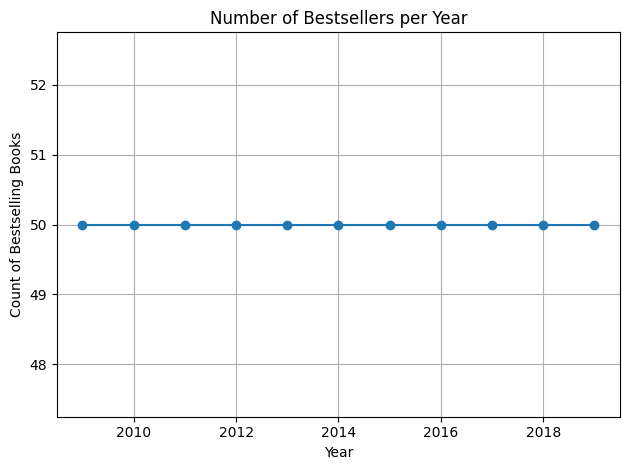

In [21]:
yearly_count = df.groupby('year')['name'].count()

plt.plot(yearly_count.index, yearly_count.values, marker='o')
plt.title("Number of Bestsellers per Year")
plt.xlabel("Year")
plt.ylabel("Count of Bestselling Books")
plt.grid(True)
plt.tight_layout()
plt.show()

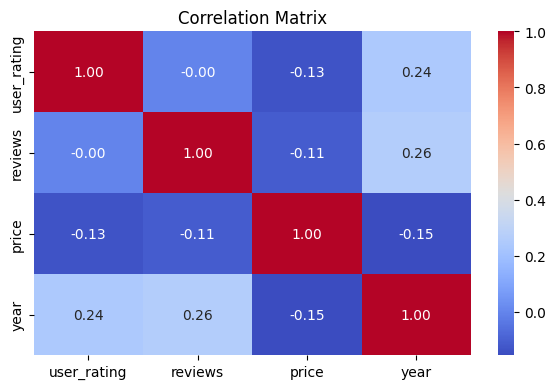

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Here from this correlation matrix its clear that
* **user_rating vs reviews** -0.00 no correlation ( no effect )
* **user_rating vs price** -0.13 slight negative correlation ( higher priced books may hav less rating)
* **user_rating vs year** 0.24 weak positive ( recent books with higher rating )
* **reviews vs price** -0.11 slight negative ( very weak affect of price on review count )
* **review vs year** 0.26 weak positive (recent books getting more review)
* **price vs year** -0.15 slight negative ( almost no effect , price may be dropping per year )




